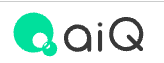

[disclaimer](../disclaimer.txt/)

# Data Handler

This component is responsible for retrieving and storing data from a database.  <br>
It includes functionalities for processing the stored data to create new features and for visualizing the data in graphs.

## 0. Preparation

In [1]:
# Import the libraries needed for the sample.
import os
import pandas as pd

### Import the Data Handler (DAL)

In [2]:
from aiq_strategy_robot.data.data_accessor import DAL
sdh = DAL()

### Import helper functions

When loading data from data sources (e.g., **factset**, **finnhub**), the handler's helper functions are used.<br>
Below, we import the helper functions used in this sample.

In [3]:
from aiq_strategy_robot.data.FINNHUB import (
    load_finnhub_symbol_lookup,
    load_finnhub_fundamental, 
    load_finnhub_equity_data, 
)

from aiq_strategy_robot.data.ALTERNATIVE import (
    load_alternative_aiq_pos_csmr_goods_universe, 
    load_alternative_aiq_pos_csmr_goods_data
)

## 1. symbol_lookup

This is the endpoint used to look up the symbol codes of each data vendor from the general Bloomberg ticker codes.

In [4]:
# Example: `finnhub loader`'s `symbol_lookup`
tickers = ['4661 JP', '9983 JP', 'AAPL US']

df_symbols_finnhub = load_finnhub_symbol_lookup(sdh, exchange_code='T', tickers=['4661 JP', '9983 JP', 'AAPL US']).retrieve()
display(df_symbols_finnhub.head())

,currency,description,displaySymbol,figi,isin,mic,shareClassFIGI,symbol,symbol2,type,TICKER
0,JPY,ORIENTAL LAND CO LTD,4661.T,BBG000HPZ220,None,XJPX,BBG001S9BPK7,4661.T,,Common Stock,4661 JP
1,JPY,FAST RETAILING CO LTD,9983.T,BBG000CLY9R3,None,XJPX,BBG001S82FV9,9983.T,,Common Stock,9983 JP
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL.T,NaN,NaN,AAPL US


### Retrieve symbols that exist in both alternative data and Finnhub. 

#### Get the universe of aiQ POS csmr goods from alternative data.

In [5]:
sdh = DAL()
aiq_pos_universe = load_alternative_aiq_pos_csmr_goods_universe(sdh).retrieve()
aiq_pos_universe.head()

,FIGI,TICKER
0,BBG000FRFVY1,2692
1,BBG000BHG4Y6,2004
2,BBG000BFVY31,2502
3,BBG000BJQ7X5,4507
5,BBG000BRBK46,8200


#### Retrieve Finnhub symbols
Obtain Finnhub symbols using the Ticker from the `aiQ POS csmr goods` universe.

In [6]:
# Retrieve Symbols
df_symbols_finnhub = load_finnhub_symbol_lookup(sdh, exchange_code='T', tickers=(aiq_pos_universe.TICKER + ' JP').to_list() ).retrieve()

Extract 6 samples as an example

In [7]:
num = 6
df_symbols_finnhub = df_symbols_finnhub.dropna(subset='currency').sample(num)
display(df_symbols_finnhub)

tickers = df_symbols_finnhub.TICKER.to_list()
alt_tickers = df_symbols_finnhub.TICKER.str.split(' ').str[0].to_list()
finnhub_symbols = df_symbols_finnhub.symbol.to_list()

,currency,description,displaySymbol,figi,isin,mic,shareClassFIGI,symbol,symbol2,type,TICKER
183,JPY,MANDOM CORP,4917.T,BBG000BKB4J1,None,XJPX,BBG001S6J3G9,4917.T,,Common Stock,4917 JP
180,JPY,FUJIFILM HOLDINGS CORP,4901.T,BBG000BTG7M6,None,XJPX,BBG001S77WX7,4901.T,,Common Stock,4901 JP
76,JPY,AJINOMOTO CO INC,2802.T,BBG000BJ8MJ8,None,XJPX,BBG001S6C8G5,2802.T,,Common Stock,2802 JP
228,JPY,YUASA FUNASHOKU CO LTD,8006.T,BBG000B9WLT4,None,XJPX,BBG001S5NW27,8006.T,,Common Stock,8006 JP
61,JPY,SUNTORY BEVERAGE & FOOD LTD,2587.T,BBG004ML6DB3,None,XJPX,BBG004ML6DW0,2587.T,,Common Stock,2587 JP
201,JPY,GODO STEEL LTD,5410.T,BBG000BL6KB7,None,XJPX,BBG001S6FDT7,5410.T,,Common Stock,5410 JP


## 2. Obtain stock prices

In [8]:
sdh = DAL()

# Obtain daily data
load_finnhub_equity_data(
    sdh,
    symbols=finnhub_symbols,
    freq='D',
    start_datetime='2010-01-01', 
    end_datetime='2024-01-01'
).retrieve().head()

5410.T: loading...: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]


close    high     low    open  volume  dividends  \
TICKER  DATETIME                                                        
4917 JP 2010-01-04  1314.5  1320.5  1305.5  1310.0   69400        0.0   
        2010-01-05  1350.0  1368.0  1330.0  1340.0  225600        0.0   
        2010-01-06  1325.0  1357.5  1317.5  1350.0   78400        0.0   
        2010-01-07  1372.5  1375.0  1317.5  1317.5  161200        0.0   
        2010-01-08  1350.0  1377.5  1348.5  1375.0  110000        0.0   

                    split_ratio  
TICKER  DATETIME                 
4917 JP 2010-01-04          0.5  
        2010-01-05          0.5  
        2010-01-06          0.5  
        2010-01-07          0.5  
        2010-01-08          0.5

In [9]:
# Obtain weekly data
load_finnhub_equity_data(
    sdh,
    symbols=finnhub_symbols,
    freq='W',
    start_datetime='2010-01-01', 
    end_datetime='2024-01-01'
).retrieve().head()

5410.T: loading...: 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]


close    high     low    open     volume  dividends  \
TICKER  DATETIME                                                           
4917 JP 2010-01-04  1350.0  1377.5  1305.5  1310.0   644600.0        0.0   
        2010-01-12  1355.0  1420.0  1331.0  1375.0   562600.0        0.0   
        2010-01-18  1301.5  1375.5  1293.0  1375.0   520400.0        0.0   
        2010-01-25  1255.0  1350.0  1255.0  1276.5   722800.0        0.0   
        2010-02-01  1283.0  1341.0  1281.5  1300.0  1037800.0        0.0   

                    split_ratio  
TICKER  DATETIME                 
4917 JP 2010-01-04          0.5  
        2010-01-12          0.5  
        2010-01-18          0.5  
        2010-01-25          0.5  
        2010-02-01          0.5

### Appendix

#### 1. Check the loaded data

The obtained data is registered with the handler, and each dataset is assigned a `data_id`.

In [10]:
sdh.extract_definition

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,finnhub,equity_data,None,None,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-29 00:00:00
2,RawData,finnhub,equity_data,None,NaN,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-28 00:00:00


In [11]:
# Set aliases
sdh.set_alias({1: 'finhub_price_D', 2: 'finhub_price_W'})
sdh.extract_definition

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,finnhub,equity_data,None,finhub_price_D,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-29 00:00:00
2,RawData,finnhub,equity_data,None,finhub_price_W,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-28 00:00:00


#### 2. Retrieve data immediately after loading with the `retrieve` method
The `retrieve` method can only obtain data that was loaded immediately before.


In [12]:
sdh.retrieve().tail()

close    high     low    open    volume  dividends  \
TICKER  DATETIME                                                          
5410 JP 2023-11-27  4610.0  4635.0  4485.0  4535.0  704100.0        0.0   
        2023-12-04  4285.0  4635.0  4240.0  4615.0  769100.0        0.0   
        2023-12-11  4370.0  4395.0  4235.0  4355.0  618800.0        0.0   
        2023-12-18  4420.0  4450.0  4295.0  4365.0  560400.0        0.0   
        2023-12-25  4590.0  4640.0  4415.0  4490.0  442100.0        0.0   

                    split_ratio  
TICKER  DATETIME                 
5410 JP 2023-11-27          1.0  
        2023-12-04          1.0  
        2023-12-11          1.0  
        2023-12-18          1.0  
        2023-12-25          1.0

#### 3. Retrieve data using the `get_raw_data` method by specifying the `data_id`.
You can retrieve registered data using the `data_id`.

In [13]:
sdh.get_raw_data(2).tail()

close    high     low    open   volume  dividends  \
TICKER  DATETIME                                                         
8006 JP 2023-11-27  3095.0  3130.0  3040.0  3040.0   5900.0        0.0   
        2023-12-04  3095.0  3145.0  3050.0  3095.0   6500.0        0.0   
        2023-12-11  3090.0  3160.0  3075.0  3150.0   4600.0        0.0   
        2023-12-18  3085.0  3140.0  3045.0  3090.0   4000.0        0.0   
        2023-12-25  3200.0  3250.0  3065.0  3085.0  11000.0        0.0   

                    split_ratio  
TICKER  DATETIME                 
8006 JP 2023-11-27          1.0  
        2023-12-04          1.0  
        2023-12-11          1.0  
        2023-12-18          1.0  
        2023-12-25          1.0

## 3. Retrieval of Financial Data

In [14]:
load_finnhub_fundamental(
    sdh,
    symbols=finnhub_symbols,
    st_type='ic',         # `bs`, `ic`, `cf` for Balance Sheet, Income Statement
    freq='quarterly', 
    start_datetime='2010-01-01',  
    end_datetime='2024-01-01',
    with_calendar=False
).retrieve().head()

5410.T: loading...: 100%|██████████| 6/6 [00:00<00:00,  6.82it/s]


costOfGoodsSold  dilutedAverageSharesOutstanding  \
TICKER  DATETIME                                                       
4917 JP 2014-09-30             8242                             47.0   
        2014-12-31             7282                             47.0   
        2015-03-31             7715                             47.0   
        2015-06-30             9485                             47.0   
        2015-09-30             9490                             47.0   

                    dilutedEPS  ebit  gainLossOnDispositionOfAssets  \
TICKER  DATETIME                                                      
4917 JP 2014-09-30       27.29  1934                            4.0   
        2014-12-31       23.87  1780                            6.0   
        2015-03-31       -1.78   -24                            0.0   
        2015-06-30       52.91  3836                            0.0   
        2015-09-30       75.06  1518                         4121.0   

                    grossIncome  interestIncomeExpense  minorityInterest  \
TICKER  DATETIME                                                           
4917 JP 2014-09-30        10562                     60              -109   
        2014-12-31         8803                    157              -191   
        2015-03-31         8673                     87               -88   
        2015-06-30        11609                    238              -260   
        2015-09-30        11357                    125             -1572   

                    netIncome  netIncomeAfterTaxes  nonRecurringItems  \
TICKER  DATETIME                                                        
4917 JP 2014-09-30       1283                 1391               -8.0   
        2014-12-31       1122                 1313              -32.0   
        2015-03-31        -83                    5              -35.0   
        2015-06-30       2487                 2748              -82.0   
        2015-09-30       3528                 5099             -201.0   

                    otherOperatingExpensesTotal  pretaxIncome  \
TICKER  DATETIME                                                
4917 JP 2014-09-30                          NaN          2023   
        2014-12-31                          NaN          1929   
        2015-03-31                          0.0            29   
        2015-06-30                          1.0          4008   
        2015-09-30                          1.0          5676   

                    provisionforIncomeTaxes  revenue  sgaExpense  \
TICKER  DATETIME                                                   
4917 JP 2014-09-30                      632    18804        8628   
        2014-12-31                      616    16085        7023   
        2015-03-31                       24    16388        8697   
        2015-06-30                     1260    21094        7772   
        2015-09-30                      577    20847        9838   

                    totalOperatingExpense  totalOtherIncomeExpenseNet  \
TICKER  DATETIME                                                        
4917 JP 2014-09-30                   8628                        33.0   
        2014-12-31                   7023                        18.0   
        2015-03-31                   8697                         1.0   
        2015-06-30                   7773                        16.0   
        2015-09-30                   9839                       113.0   

                    equityEarningsAffiliates  researchDevelopment  
TICKER  DATETIME                                                   
4917 JP 2014-09-30                       NaN                  NaN  
        2014-12-31                       NaN                  NaN  
        2015-03-31                       NaN                  NaN  
        2015-06-30                       NaN                  NaN  
        2015-09-30                       NaN                  NaN

In [15]:
load_finnhub_fundamental(
    sdh,
    symbols=finnhub_symbols,
    st_type='bs',         # `bs`, `ic`, `cf` for Balance Sheet, Income Statement
    freq='quarterly', 
    start_datetime='2010-01-01',  
    end_datetime='2024-01-01',
    with_calendar=False
).retrieve().head()

5410.T: loading...: 100%|██████████| 6/6 [00:00<00:00,  6.71it/s]


accountsPayable  accountsReceivables  accruedLiability  \
TICKER  DATETIME                                                             
4917 JP 2014-09-30           1577.0                 8012            1063.0   
        2014-12-31           1988.0                 9043             694.0   
        2015-03-31           1605.0                 9644             837.0   
        2015-06-30           2001.0                10460             575.0   
        2015-09-30           1369.0                 9623            1155.0   

                    additionalPaidInCapital  cashEquivalents  \
TICKER  DATETIME                                               
4917 JP 2014-09-30                  11235.0             6800   
        2014-12-31                  11235.0             7693   
        2015-03-31                  11235.0             8597   
        2015-06-30                  11235.0             7346   
        2015-09-30                  11235.0            10448   

                    cashShortTermInvestments  commonStock  currentAssets  \
TICKER  DATETIME                                                           
4917 JP 2014-09-30                     26992        11394          45454   
        2014-12-31                     25389        11394          45676   
        2015-03-31                     26393        11394          48067   
        2015-06-30                     25743        11394          48258   
        2015-09-30                     32244        11394          52312   

                    currentLiabilities  goodwill  ...  totalEquity  \
TICKER  DATETIME                                  ...                
4917 JP 2014-09-30               10339       NaN  ...        53355   
        2014-12-31                9537       NaN  ...        54468   
        2015-03-31               11794       NaN  ...        55975   
        2015-06-30               11451       NaN  ...        57560   
        2015-09-30               10481       NaN  ...        60881   

                    totalLiabilities  totalReceivables  treasuryStock  \
TICKER  DATETIME                                                        
4917 JP 2014-09-30             16956              8012        -1853.0   
        2014-12-31             16748              9043        -1854.0   
        2015-03-31             20005              9644        -1855.0   
        2015-06-30             19592             10460        -1855.0   
        2015-09-30             20251              9623        -1856.0   

                    unrealizedProfitLossSecurity  accumulatedDepreciation  \
TICKER  DATETIME                                                            
4917 JP 2014-09-30                         906.0                      NaN   
        2014-12-31                         977.0                      NaN   
        2015-03-31                        1577.0                      NaN   
        2015-06-30                        2013.0                      NaN   
        2015-09-30                        1904.0                      NaN   

                    currentPortionLongTermDebt  deferredIncomeTax  \
TICKER  DATETIME                                                    
4917 JP 2014-09-30                         NaN                NaN   
        2014-12-31                         NaN                NaN   
        2015-03-31                         NaN                NaN   
        2015-06-30                         NaN                NaN   
        2015-09-30                         NaN                NaN   

                    shortTermInvestments  noteReceivableLongTerm  
TICKER  DATETIME                                                  
4917 JP 2014-09-30               20192.0                     NaN  
        2014-12-31               17696.0                     NaN  
        2015-03-31               17796.0                     NaN  
        2015-06-30               18397.0                     NaN  
        2015-09-30               21796.0                     N

In [16]:
sdh.extract_definition

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,finnhub,equity_data,None,finhub_price_D,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-29 00:00:00
2,RawData,finnhub,equity_data,None,finhub_price_W,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-28 00:00:00
3,RawData,finnhub,fundamental,None,None,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2014-09-30 00:00:00,2023-12-31 00:00:00
4,RawData,finnhub,fundamental,None,NaN,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2014-09-30 00:00:00,2023-12-31 00:00:00


In [17]:
sdh.set_alias({ 3: 'finhub_ic', 4: 'finhub_bs'})
sdh.extract_definition

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,finnhub,equity_data,None,finhub_price_D,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-29 00:00:00
2,RawData,finnhub,equity_data,None,finhub_price_W,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-28 00:00:00
3,RawData,finnhub,fundamental,None,finhub_ic,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2014-09-30 00:00:00,2023-12-31 00:00:00
4,RawData,finnhub,fundamental,None,finhub_bs,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2014-09-30 00:00:00,2023-12-31 00:00:00


## 4. Retrieval of Alternative Data (aiQ POS csmr goods)

In [18]:
_sdh = DAL()

# generation=1
load_alternative_aiq_pos_csmr_goods_data(
    _sdh,
    generation=1,   # The generation of the data to retrieve.
    ticker=alt_tickers,
    variable = ['pos_sales', 'share', 'unit_price'],
    load_only_raw=True,
    load_only_latest=True
).retrieve().head()

,TICKER,FIGI,DATETIME,VARIABLE,SMOOTH,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,2587,BBG004ML6D96,2012-07-15,pos_sales,0,149.839196,1,2012-07-20 08:00:00
1,2587,BBG004ML6D96,2012-07-15,share,0,0.235174,1,2012-07-20 08:00:00
2,2587,BBG004ML6D96,2012-07-15,unit_price,0,1.401688,1,2012-07-20 08:00:00
3,2587,BBG004ML6D96,2012-07-22,pos_sales,0,150.974740,1,2012-07-26 08:00:00
4,2587,BBG004ML6D96,2012-07-22,share,0,0.231451,1,2012-07-26 08:00:00


In [19]:
# generation=2
load_alternative_aiq_pos_csmr_goods_data(
    _sdh,
    generation=2,   # The generation of the data to retrieve.
    ticker=alt_tickers,
    variable = ['sales', 'pos_sales', 'share', 'unit_price'],
    load_only_raw=True,
    load_only_latest=True
).retrieve().head()

,TICKER,FIGI,DATETIME,VARIABLE,SMOOTH,VALUE,BACKFILL,RELEASE_TIMESTAMP
0,2587,BBG004ML6D96,2017-01-08,pos_sales,0,132.255376,1,2017-01-13 08:00:00
1,2587,BBG004ML6D96,2017-01-08,share,0,0.263528,1,2017-01-13 08:00:00
2,2587,BBG004ML6D96,2017-01-08,unit_price,0,0.689354,1,2017-01-13 08:00:00
3,2587,BBG004ML6D96,2017-01-15,pos_sales,0,133.333438,1,2017-01-19 08:00:00
4,2587,BBG004ML6D96,2017-01-15,share,0,0.266005,1,2017-01-19 08:00:00


In [20]:
_sdh.extract_definition

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,alternative,aiq_pos_csmr_goods,data,data,None,None,None,None
2,RawData,alternative,aiq_pos_csmr_goods,data,data2,None,None,None,None


### Appendix: Data Registration

Data sources shaped in memory can be registered with the handler. When doing so, the index should be `['TICKER', 'DATETIME']`.

#### Process the alternative data obtained in step 4 for registration.

In [21]:
df_pos = _sdh.get_raw_data(2)
df_pos['TICKER'] = df_pos['TICKER'] + ' JP'
df_pos['DATETIME'] = pd.to_datetime(df_pos['DATETIME'])
df_pos = df_pos.set_index(['TICKER', 'DATETIME'])
df_pos = df_pos.pivot(columns='VARIABLE', values='VALUE')
df_pos.columns.name = ''
df_pos.tail()

pos_sales     share  unit_price
TICKER  DATETIME                                   
8006 JP 2024-08-11   0.405506  0.004824    1.227507
        2024-08-18   0.452454  0.006087    1.267659
        2024-08-25   0.767594  0.009633    1.725480
        2024-09-01   0.452035  0.006069    1.888203
        2024-09-08   0.334003  0.005036    1.707973

Register the data with the handler using `set_raw_data`.

In [22]:
data_id_alt = sdh.set_raw_data(
    data_source='aiq_pos_cmsr_goods',
    source='handmaid',
    dfraw=df_pos
)
sdh.set_alias({data_id_alt: 'cmsr_goods'})

display(sdh.get_raw_data(data_id_alt).tail())
display(sdh.extract_definition)

pos_sales     share  unit_price
TICKER  DATETIME                                   
8006 JP 2024-08-11   0.405506  0.004824    1.227507
        2024-08-18   0.452454  0.006087    1.267659
        2024-08-25   0.767594  0.009633    1.725480
        2024-09-01   0.452035  0.006069    1.888203
        2024-09-08   0.334003  0.005036    1.707973

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,finnhub,equity_data,None,finhub_price_D,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-29 00:00:00
2,RawData,finnhub,equity_data,None,finhub_price_W,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2010-01-04 00:00:00,2023-12-28 00:00:00
3,RawData,finnhub,fundamental,None,finhub_ic,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2014-09-30 00:00:00,2023-12-31 00:00:00
4,RawData,finnhub,fundamental,None,finhub_bs,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2014-09-30 00:00:00,2023-12-31 00:00:00
5,RawData,aiq_pos_cmsr_goods,handmaid,Unknown,cmsr_goods,"[2587 JP, 2802 JP, 4901 JP, 4917 JP, 5410 JP, ...","[TICKER, DATETIME]",2017-01-08 00:00:00,2024-09-08 00:00:00


### Selecting Data Sources

Choose the `data_id` to specify for subsequent data transformations and other operations.

In [23]:
data_id_funda = 3
data_id_alt = data_id_alt

## 5. Example of Transformation

Use the `sdh.transform` accessor to apply variable transformations to the retrieved data.

In [24]:
sdh.transform.clear()

# KPI
kpi = sdh.transform.resample(data_id=data_id_funda, fields='revenue', rule='Q', func='mean').fillna(method='ffill').variable_ids[0]

# Features
alt_W_shift_1_ids = sdh.transform.shift(data_id=data_id_alt, periods=1).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_2_ids = sdh.transform.shift(data_id=data_id_alt, periods=2).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_3_ids = sdh.transform.shift(data_id=data_id_alt, periods=3).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_4_ids = sdh.transform.shift(data_id=data_id_alt, periods=4).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_5_ids = sdh.transform.shift(data_id=data_id_alt, periods=5).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_6_ids = sdh.transform.shift(data_id=data_id_alt, periods=6).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_7_ids = sdh.transform.shift(data_id=data_id_alt, periods=7).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids
alt_W_shift_8_ids = sdh.transform.shift(data_id=data_id_alt, periods=8).resample(rule='Q', func='mean').log_diff(periods=4).diff(periods=1).variable_ids

### Appendix

#### Check the List of Transformed Variables

Each variable subjected to transformation processing is assigned a unique `variable_id`.

In [25]:
sdh.transform.find_variables().tail()

,variable_id,data_id,data_source,source,table,field,ticker,reference_id,variable_type,method,params,process_id
variable_name,,,,,,,,,,,,
"CmsrGoods_Share_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)",94,5,aiq_pos_cmsr_goods,handmaid,Unknown,"CmsrGoods_Share_Shifted(008)_Resampled(Q|mean,...",None,91.0,feature,log_diff,periods=4,33
"CmsrGoods_Unit_price_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)",95,5,aiq_pos_cmsr_goods,handmaid,Unknown,CmsrGoods_Unit_price_Shifted(008)_Resampled(Q|...,None,92.0,feature,log_diff,periods=4,33
"CmsrGoods_Pos_sales_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)_Diff(001)",96,5,aiq_pos_cmsr_goods,handmaid,Unknown,CmsrGoods_Pos_sales_Shifted(008)_Resampled(Q|m...,None,93.0,feature,diff,periods=1,34
"CmsrGoods_Share_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)_Diff(001)",97,5,aiq_pos_cmsr_goods,handmaid,Unknown,"CmsrGoods_Share_Shifted(008)_Resampled(Q|mean,...",None,94.0,feature,diff,periods=1,34
"CmsrGoods_Unit_price_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)_Diff(001)",98,5,aiq_pos_cmsr_goods,handmaid,Unknown,CmsrGoods_Unit_price_Shifted(008)_Resampled(Q|...,None,95.0,feature,diff,periods=1,34


#### Check the List of Method Chains

You can view the list of method chains, including the defined variables and the sequence of applied transformation processes.<br>
Each method chain is uniquely identified by a `process_id`.

In [26]:
dfmc = sdh.transform.show_method_chain(end_only=True, ret_df=True)

,data_id,variable_id,step_001,step_002,step_003,step_004
process_id,,,,,,
2,3,[2],"resample(rule=""Q"", func=""mean"", origin=""start_day"")","fillna(method=""ffill"")",,
6,5,"[12, 13, 14]",shift(periods=1),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
10,5,"[24, 25, 26]",shift(periods=2),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
14,5,"[36, 37, 38]",shift(periods=3),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
18,5,"[48, 49, 50]",shift(periods=4),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
22,5,"[60, 61, 62]",shift(periods=5),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
26,5,"[72, 73, 74]",shift(periods=6),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
30,5,"[84, 85, 86]",shift(periods=7),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
34,5,"[96, 97, 98]",shift(periods=8),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)


Check the list of variables corresponding to the `process_id` key.

In [27]:
sdh.transform.find_process(dfmc.index[-1]).head()

,variable_id,data_id,data_source,source,table,field,ticker,reference_id,variable_type,method,params,process_id
variable_name,,,,,,,,,,,,
"CmsrGoods_Pos_sales_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)_Diff(001)",96,5,aiq_pos_cmsr_goods,handmaid,Unknown,CmsrGoods_Pos_sales_Shifted(008)_Resampled(Q|m...,None,93,feature,diff,periods=1,34
"CmsrGoods_Share_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)_Diff(001)",97,5,aiq_pos_cmsr_goods,handmaid,Unknown,"CmsrGoods_Share_Shifted(008)_Resampled(Q|mean,...",None,94,feature,diff,periods=1,34
"CmsrGoods_Unit_price_Shifted(008)_Resampled(Q|mean, origin=""start_day"")_LogDiff(004)_Diff(001)",98,5,aiq_pos_cmsr_goods,handmaid,Unknown,CmsrGoods_Unit_price_Shifted(008)_Resampled(Q|...,None,95,feature,diff,periods=1,34


#### Undo or Clear Processing

#### Check transformed data
Specify the `variable_id` to retrieve the transformed data.

In [28]:
display(sdh.get_variables(kpi).tail())
display(sdh.get_variables(alt_W_shift_1_ids).tail())

FinhubIc_Revenue_Resampled(Q|mean, origin="start_day")_Fillna(method="ffill")
TICKER  DATETIME                                                                                 
8006 JP 2022-12-31                                            31693.0                            
        2023-03-31                                            27951.0                            
        2023-06-30                                            30193.0                            
        2023-09-30                                            29706.0                            
        2023-12-31                                            31749.0

CmsrGoods_Pos_sales_Shifted(001)_Resampled(Q|mean, origin="start_day")_LogDiff(004)_Diff(001)  \
TICKER  DATETIME                                                                                                    
8006 JP 2023-09-30                                          -0.070941                                               
        2023-12-31                                           0.158149                                               
        2024-03-31                                          -0.019953                                               
        2024-06-30                                           0.197110                                               
        2024-09-30                                           0.716920                                               

                    CmsrGoods_Share_Shifted(001)_Resampled(Q|mean, origin="start_day")_LogDiff(004)_Diff(001)  \
TICKER  DATETIME                                                                                                
8006 JP 2023-09-30                                          -0.071059                                           
        2023-12-31                                           0.148573                                           
        2024-03-31                                          -0.062352                                           
        2024-06-30                                           0.135059                                           
        2024-09-30                                           0.486048                                           

                    CmsrGoods_Unit_price_Shifted(001)_Resampled(Q|mean, origin="start_day")_LogDiff(004)_Diff(001)  
TICKER  DATETIME                                                                                                    
8006 JP 2023-09-30                                           0.034672                                               
        2023-12-31                                           0.034302                                               
        2024-03-31                                           0.063529                                               
        2024-06-30                                           0.069153                                               
        2024-09-30                                           0.184685

> sortcut for `get_variables`

In [29]:
sdh.gd(alt_W_shift_1_ids).tail()

CmsrGoods_Pos_sales_Shifted(001)_Resampled(Q|mean, origin="start_day")_LogDiff(004)_Diff(001)  \
TICKER  DATETIME                                                                                                    
8006 JP 2023-09-30                                          -0.070941                                               
        2023-12-31                                           0.158149                                               
        2024-03-31                                          -0.019953                                               
        2024-06-30                                           0.197110                                               
        2024-09-30                                           0.716920                                               

                    CmsrGoods_Share_Shifted(001)_Resampled(Q|mean, origin="start_day")_LogDiff(004)_Diff(001)  \
TICKER  DATETIME                                                                                                
8006 JP 2023-09-30                                          -0.071059                                           
        2023-12-31                                           0.148573                                           
        2024-03-31                                          -0.062352                                           
        2024-06-30                                           0.135059                                           
        2024-09-30                                           0.486048                                           

                    CmsrGoods_Unit_price_Shifted(001)_Resampled(Q|mean, origin="start_day")_LogDiff(004)_Diff(001)  
TICKER  DATETIME                                                                                                    
8006 JP 2023-09-30                                           0.034672                                               
        2023-12-31                                           0.034302                                               
        2024-03-31                                           0.063529                                               
        2024-06-30                                           0.069153                                               
        2024-09-30                                           0.184685

## 6. Data Visualization

### Plot Line
For a specified target (ticker) KPI (y), draw a line plot for other variables (X).

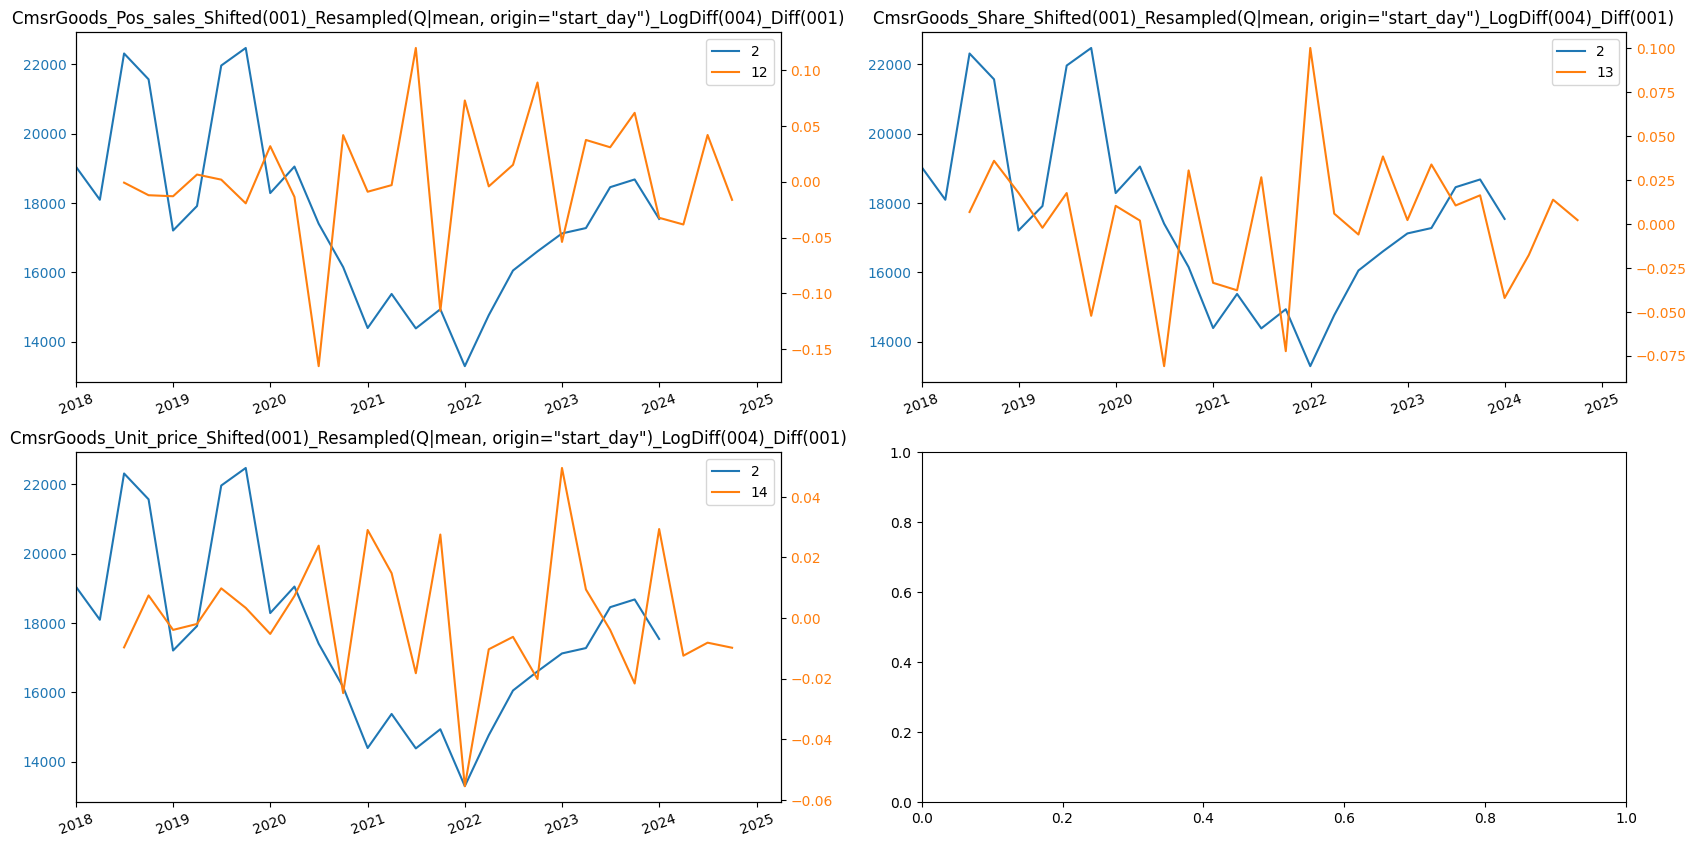

In [30]:
start_date='2018-01-01'

sdh.show_line_one_target(
    target=tickers[0],
    y=kpi,
    X=alt_W_shift_1_ids[:4],
    start_date=start_date,
    col_num=2,
    chunk_size=6,
)

For each target (ticker), draw a line plot of the KPI (y) and the variable (x).

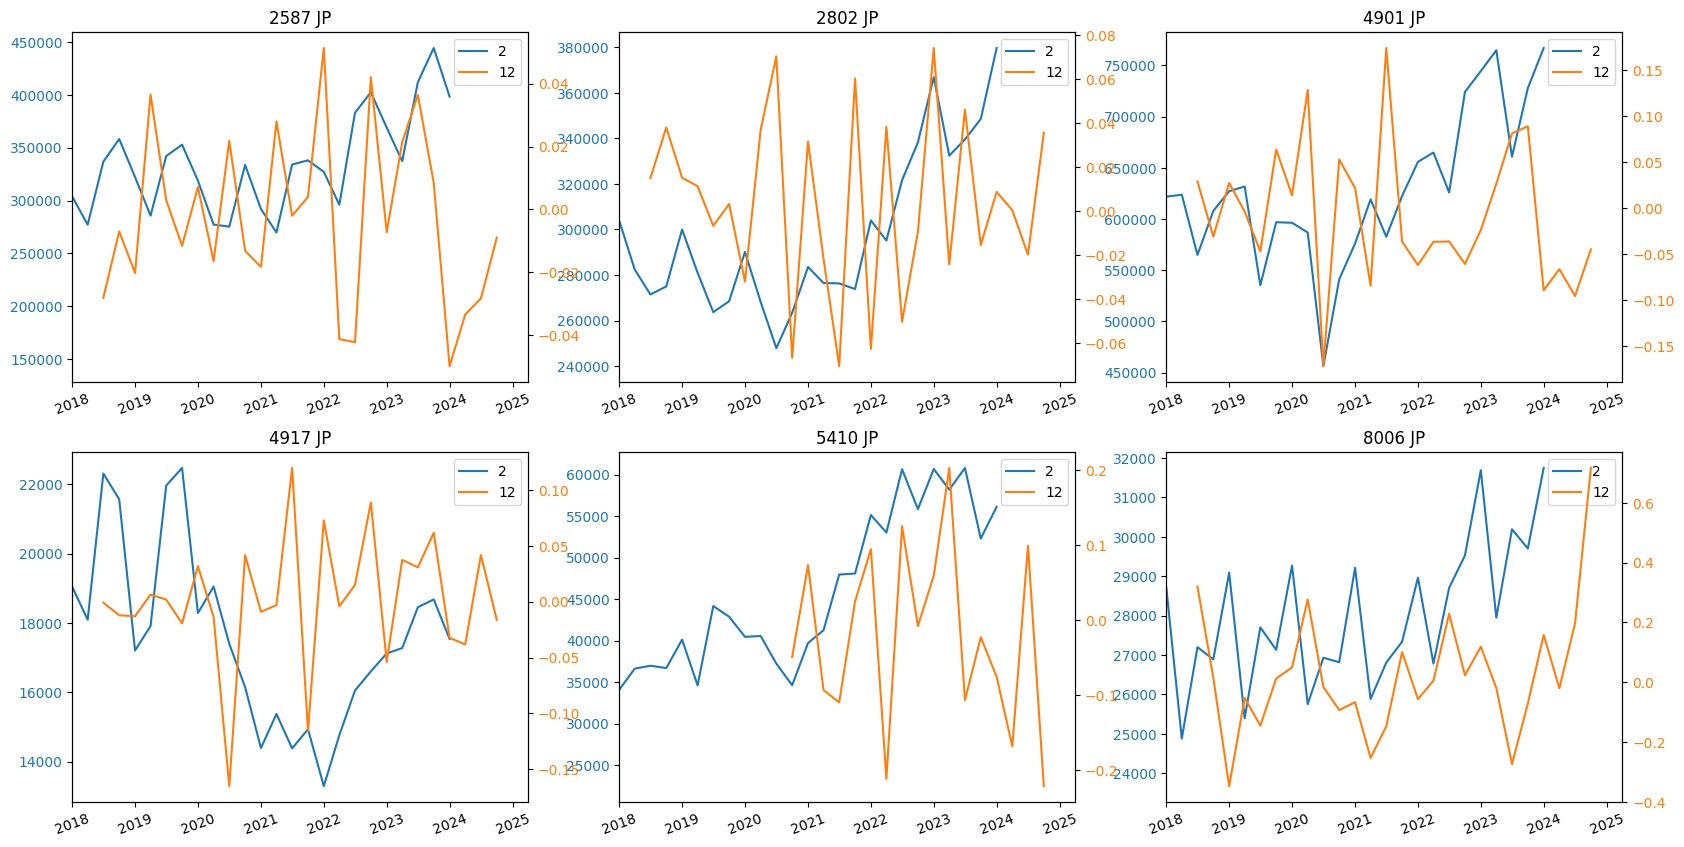

In [31]:
sdh.show_line_per_target(
    y=kpi,
    x=alt_W_shift_1_ids[0],
    # targets=tickers,
    start_date=start_date,
    col_num=3,
    chunk_size=6)


### Plot Scatter

Draw a scatter plot of the KPI (y) and other variables (X) for the specified target (ticker).

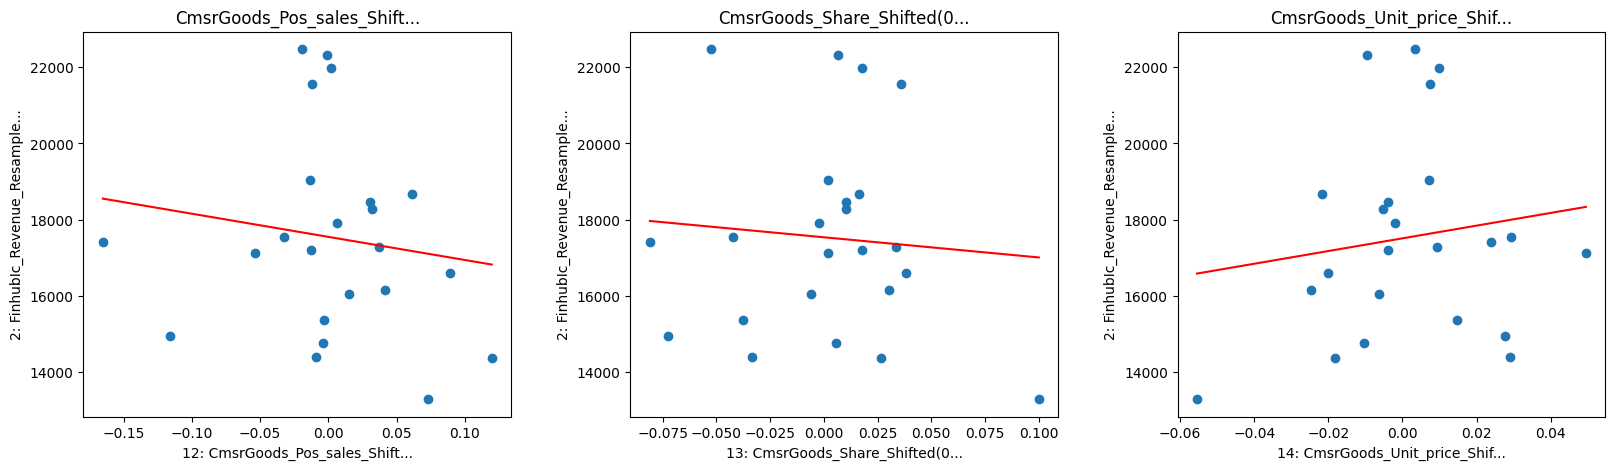

In [32]:
sdh.show_scatter_one_target(
    target=tickers[0],
    y=kpi,
    X=alt_W_shift_1_ids[-6:],
    start_date=start_date,
    col_num=3,
    vname_len_limit=25,
)

Draw scatter plots of the KPI (y) and variable (x) for each target (ticker).

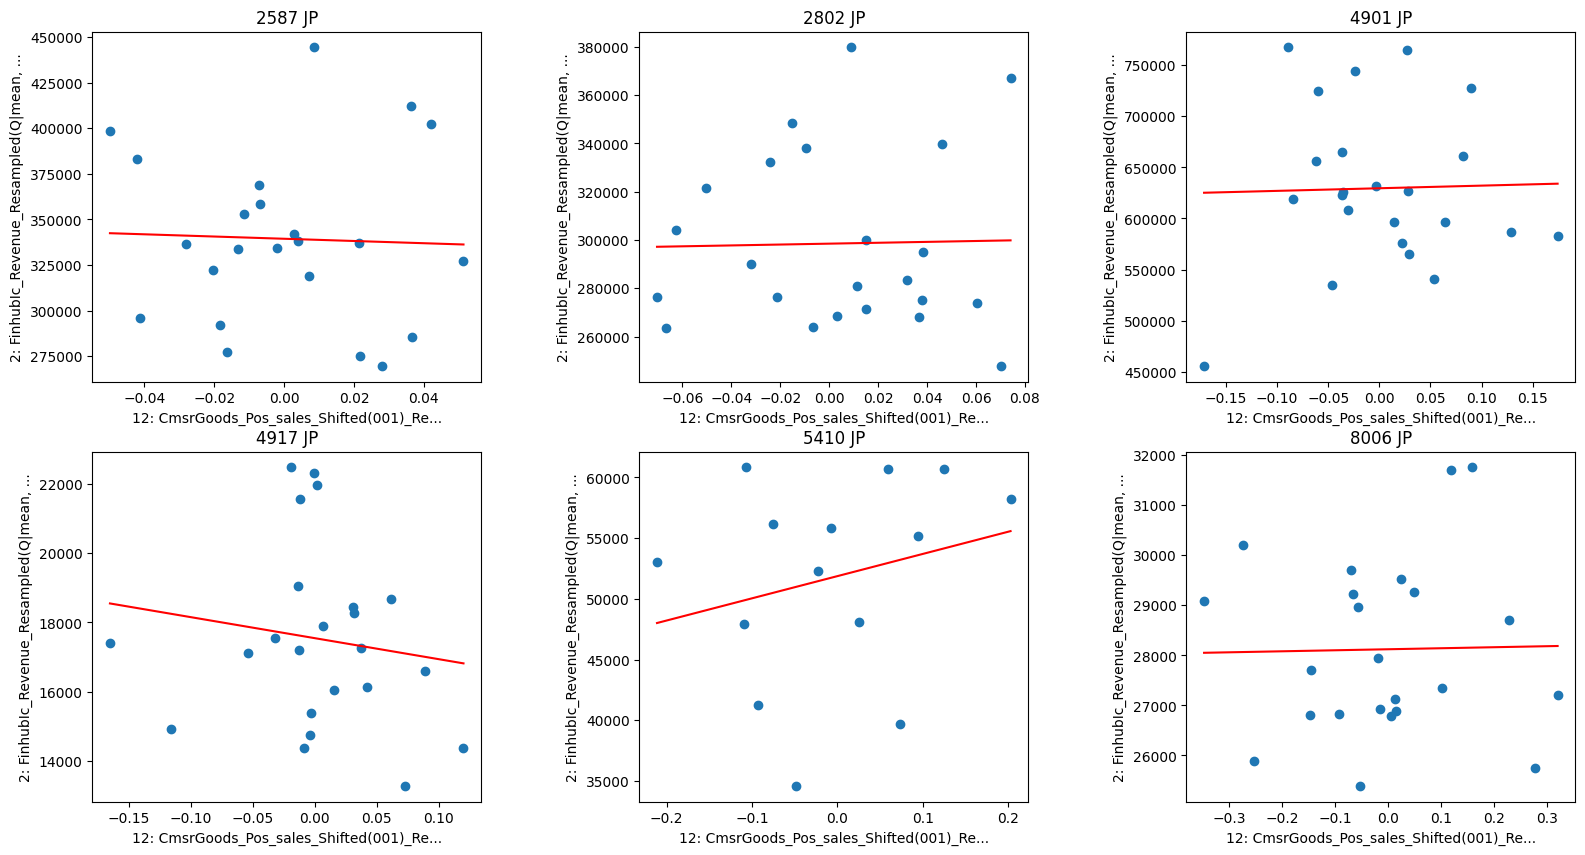

In [33]:
sdh.show_scatter_per_target(
    y=kpi,
    x=alt_W_shift_1_ids[0],
    # targets=tickers,
    start_date=start_date,
    col_num=3,
    vname_len_limit=35,
)